In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Clasificador de Vinos con KNN
Entrena un modelo de K-Vecinos más Cercanos (KNN) para predecir la calidad de un vino tinto a partir de sus características químicas. ¿Podría una IA ayudarte a elegir un vino digno de sommelier?

Utilizaremos el siguiente dataset de vinos tintos extraido de Wine Quality Data Set - UCI

### Descripción de las columnas
Cada fila representa un vino. Las columnas describen su composición química:

fixed acidity, volatile acidity, citric acid

residual sugar, chlorides

free sulfur dioxide, total sulfur dioxide

density, pH, sulphates, alcohol

La columna objetivo es label:

0 = Baja calidad

1 = Calidad media

2 = Alta calidad

## EDA.

In [265]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/proyecto08ml.csv', sep=';')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [267]:
df.drop_duplicates(inplace=True)

In [268]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [269]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

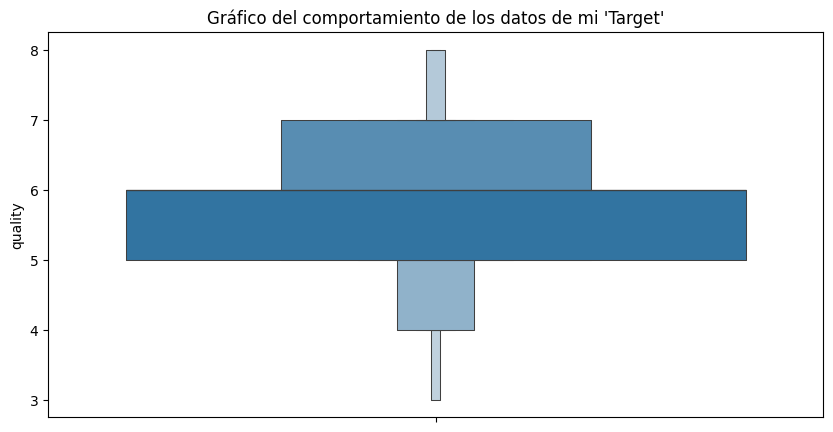

In [270]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df['quality'])
plt.title("Gráfico del comportamiento de los datos de mi 'Target'")
plt.show()

In [271]:

df["quality"] = np.select([df["quality"].isin([3, 4, 5]),df["quality"].isin([6, 7]),df["quality"].eq(8)],[0, 1, 2],default=df["quality"])


In [272]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Observaciones:

Calidades = {0: 'Baja calidad', 1: 'Media calidad', 2: 'Alta calidad'}

## slipt. 

In [273]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=18)

In [274]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
129,6.1,0.380,0.15,1.8,0.072,6.0,19.0,0.99550,3.42,0.57,9.4
836,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0
286,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1494,6.4,0.310,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0
667,11.3,0.340,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2
927,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2
778,8.3,0.430,0.30,3.4,0.079,7.0,34.0,0.99788,3.36,0.61,10.5


## Escalado.

In [275]:
norm_scaler = StandardScaler() 

num_variables = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
X_train_num = pd.DataFrame(norm_scaler.fit_transform(X_train[num_variables]),index=X_train.index, columns=[num_variables])
X_test_num = pd.DataFrame(norm_scaler.fit_transform(X_test[num_variables]),index=X_test.index, columns=[num_variables])

In [276]:
X_test_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
20,0.366987,-1.579667,1.047822,-0.492489,-0.191277,1.126358,0.286164,0.100698,0.486160,-0.750494,-0.935339
129,-1.233799,-0.748334,-0.750849,-0.492489,-0.300486,-1.073609,-0.957523,-0.580770,0.671884,-0.496990,-0.935339
836,-0.890773,-1.267917,-0.042282,-0.086456,-1.610999,1.795913,1.499517,-3.128408,-0.318644,-1.637759,1.126494
1461,-1.176628,1.355978,-1.568427,-0.289473,-0.562589,-1.073609,-1.139526,0.016825,1.724320,-0.243485,-0.397470
286,2.139286,-0.384625,1.429359,-0.357145,-0.278644,0.743755,-0.047508,1.620893,-1.309172,0.707156,-0.128535
...,...,...,...,...,...,...,...,...,...,...,...
1494,-1.062286,-1.112042,-1.077880,-0.763178,-0.431538,-0.212753,-0.684519,-1.057796,0.671884,0.326899,-0.397470
667,1.739089,-0.956167,0.884307,-0.357145,-0.082068,-1.073609,-1.078858,1.149108,-2.299700,0.073395,-1.114629
927,0.081132,0.758458,-0.532828,-0.221801,0.158193,-0.595355,0.741171,0.394253,-0.690092,-0.370237,-1.114629
778,0.023961,-0.488542,0.066729,0.590266,-0.147593,-0.977958,-0.502516,0.666839,0.300436,-0.243485,0.050755


### 

In [277]:
model = KNeighborsClassifier()
model.fit(X_train_num, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [278]:
y_pred_test = model.predict(X_test_num)
y_pred_train = model.predict(X_train_num)

y_pred_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0])

In [279]:
accuracy = {'Accuracy Test': accuracy_score(y_test, y_pred_test),
            'Accuracy Train': accuracy_score(y_train, y_pred_train)}
accuracy

{'Accuracy Test': 0.7463235294117647, 'Accuracy Train': 0.7801287948482061}

### Hiperparametrizacion. 

In [280]:
hiper_params = {'n_neighbors': [11, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [281]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hiper_params,
                                   n_iter=50,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train_num, y_train)
random_search.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 19}

In [282]:
random_search.best_score_

np.float64(0.7304570244789244)

In [283]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_num)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.7242647058823529

In [284]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [285]:
knn = KNeighborsClassifier()
grid= GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_num, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [286]:
grid_knn = grid.best_score_

In [288]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
y_pred = grid_knn.predict(X_test_num)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

AttributeError: 'numpy.float64' object has no attribute 'predict'